# 1. K-NN classifier

**Question** How does the k-nn algorithm work?

**Question** What are the parameters we need to choose to classify with k-NN? How can we choose them

**Question** What are the advantages and disadvantages of this algorithm? For which kind of dataset it would be appropriate and for which datasets it wouldn't?

**Question** How can we deal with nominal values in distance measurement?


In further part of the laboratory, we will perform a preprocessing of the data and a classification of a set of biomedical voice measurements. Some of them has been recorded for people with Parkinson's desease.

More about the dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons

First, we load the required packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 2. Data loading and analysis of the attributes
Let's start with the data preparation, 
#### 2.1. Load the dataset from file parkinsons.csv into data frame using library pandas (pd.read_csv). Write the body of the read_data function to return a data frame with attributes and a list with class labels. Classes are available in 'status' column. You should also remove column 'name' from the data (see function drop of dataFrame https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [2]:
def read_data(path):
    #TODO replace the following line with our code
    df = pd.read_csv(path).drop("name",axis=1)
    dfY = df["status"]
    # print(columns)
    # print(df)
    return df.drop("status", axis=1), dfY

data_X, data_Y = read_data("parkinsons.data")
# read_data("parkinsons.data")

Let's see what we have loaded.

In [3]:
data_X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data_Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

#### 1.2. Let's analyse the given data. 
* How many attributes are in given data?
* Are the attributes on the common scale?
* Are observations equally distributed for sick and healthy people?

Plot the histogram of the assigned class and analyse the distribution.


(array([ 48.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 147.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

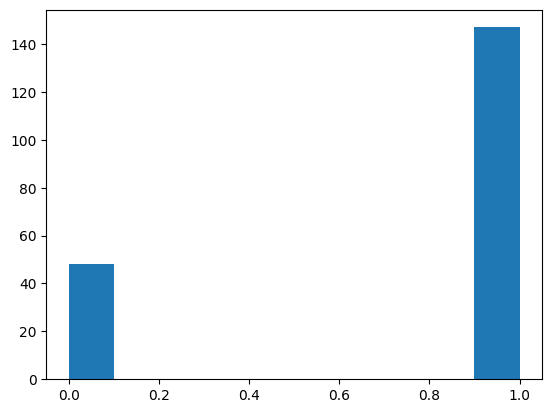

In [5]:
#TODO
plt.hist(data_Y)

Plot the histograms of the first 5 attributes. 

(array([[  0.,  51.,  88.,  46.,  10.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  12.,  88.,  59.,  24.,   1.,   1.,   3.,   2.,   5.],
        [  0., 135.,  38.,  20.,   2.,   0.,   0.,   0.,   0.,   0.],
        [195.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [195.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([7.00000000e-06, 5.92030063e+01, 1.18406006e+02, 1.77609005e+02,
        2.36812004e+02, 2.96015003e+02, 3.55218003e+02, 4.14421002e+02,
        4.73624001e+02, 5.32827001e+02, 5.92030000e+02]),
 <a list of 5 BarContainer objects>)

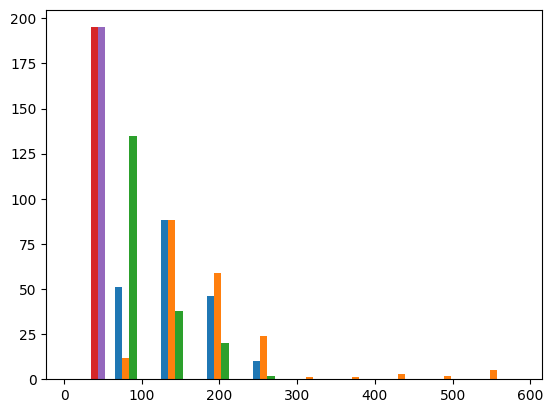

In [6]:
#TODO
plt.hist(data_X.iloc[:, :5])

# 3. Train and test set selection

#### We want to build our classifier and test it on another set of observations.

To split data into train and test sets use train_test_split method from sklearn.model_selection module (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Use 80% of cases in train set and 20% in test set. 
Use random_state = 5 just to be sure we all have the same rows in train and test sets :)

split_data should return a tuple containing: dataframe with train set attributes, list of labels for train data, dataframe with test set attributes and a list of labels for test data.

In [7]:
def split_data(data_X, data_Y, test_percent = 20, random_state=5):
#   TODO replace the following line with your code
    train_x, train_y, test_x, test_y = train_test_split(data_X, data_Y, test_size=test_percent, random_state=random_state)
    return train_x, train_y, test_x, test_y
    
(train_X, test_X, train_Y, test_Y) = split_data(data_X, data_Y)
print("rows in train set: ", train_X.shape[0])
print("rows in test set:", test_X.shape[0])


rows in train set:  175
rows in test set: 20


# 4. Data standarization/normalization
#### 4.1. Use k-nn algorithm to classify the obtained test set using k=3. What is the accuracy of the classification?

Use KNeighborsClassifier class from sklearn.neighbors module. Useful methods: fit and predict. Classification accuracy can be obtained with accuracy_score method from sklearn.metrics. Function get_classification_accuracy should return the accuracy of classification of given test set on model build with train set.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [8]:
def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k = 3):
    
    myALgortiyhm = KNeighborsClassifier(k)
    myALgortiyhm.fit(train_data_X, train_data_Y)
    predicttion = myALgortiyhm.predict(test_data_X)
    accuraccy = metrics.accuracy_score(test_data_Y, predicttion)
    print(accuraccy)
    return 0

get_classification_accuracy(train_X, train_Y, test_X, test_Y)

0.7


0

#### 4.2. Perform some normalization or standarization of attributes. Then repeat the classification. Do the classification accuracy change?

You can use sklearn.preprocessing.StandardScaler, sklearn.preprocessing.MinMaxScaler or sklearn.preprocessing.MaxAbsScaler and their fit_transform/transform methods.

Try other standarization methods to verify the standarization procedure influence the classification accuracy.
standarize_train_and_test should return 2 dataFrames - with normalized train and normalized test sets.

In [9]:
def standarize_train_and_test(train_X, test_X):
    scaler = preprocessing.StandardScaler()
    
    normalized_train_X = scaler.fit_transform(train_X)
    
    normalized_test_X = scaler.transform(test_X)
    
    normalized_train_X = pd.DataFrame(normalized_train_X, columns=train_X.columns)
    normalized_test_X = pd.DataFrame(normalized_test_X, columns=test_X.columns)
    
    return normalized_train_X, normalized_test_X

norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X)
get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y)

0.95


0

# 5. Choosing k value
Using obtained in previous exercices train set with normalization/standarization use k-nn algoritm using k from 1 to 20. Use 5-fold cross-validation within the train set to obtain the classification accuracy. Plot the obtained accuracy of the classification. Which k value seems to be the best for the given dataset?

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html for more info about cross validation in sklearn.

k=1: accuracy=0.9371
k=2: accuracy=0.8914
k=3: accuracy=0.8686
k=4: accuracy=0.8800
k=5: accuracy=0.8857
k=6: accuracy=0.8914
k=7: accuracy=0.8857
k=8: accuracy=0.8800
k=9: accuracy=0.8629
k=10: accuracy=0.8800
k=11: accuracy=0.8514
k=12: accuracy=0.8571
k=13: accuracy=0.8343
k=14: accuracy=0.8457
k=15: accuracy=0.8343
k=16: accuracy=0.8457
k=17: accuracy=0.8514
k=18: accuracy=0.8457
k=19: accuracy=0.8514
k=20: accuracy=0.8629


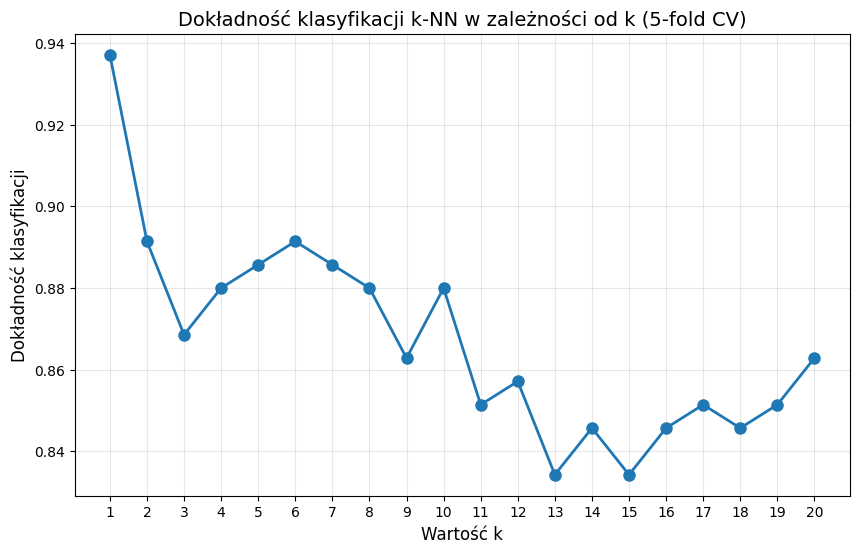


Najlepsza wartość k: 1
Najlepsza dokładność CV: 0.9371


In [10]:
from sklearn.model_selection import cross_validate

def find_best_k(train_X, train_Y, k_range=range(1, 21), cv=5):
    accuracies = []
    
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        
        cv_results = cross_validate(knn, train_X, train_Y, cv=cv, 
                                    scoring='accuracy', return_train_score=False)
        
        mean_accuracy = cv_results['test_score'].mean()
        accuracies.append(mean_accuracy)
        
        print(f"k={k}: accuracy={mean_accuracy:.4f}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, accuracies, marker='o', linewidth=2, markersize=8)
    plt.xlabel('Wartość k', fontsize=12)
    plt.ylabel('Dokładność klasyfikacji', fontsize=12)
    plt.title('Dokładność klasyfikacji k-NN w zależności od k (5-fold CV)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xticks(k_range)
    plt.show()
    
    best_k = k_range[accuracies.index(max(accuracies))]
    best_accuracy = max(accuracies)
    
    print(f"\nNajlepsza wartość k: {best_k}")
    print(f"Najlepsza dokładność CV: {best_accuracy:.4f}")
    
    return best_k, accuracies

best_k, accuracies = find_best_k(norm_train_X, train_Y)

# 6. Testing classifier
Train the k-NN classifier again and test it using the obtained best k value on a test set to check the final classification accuracy. You can just call the previous written function get_classification_accuracy)

In [11]:

def test_final_classifier(train_X, train_Y, test_X, test_Y, k):
    print(f"\nTestowanie finalnego klasyfikatora z k={k}")
    print("="*50)
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_Y)
    
    predictions = knn.predict(test_X)
    
    accuracy = metrics.accuracy_score(test_Y, predictions)
    
    print(f"Dokładność na zbiorze testowym: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    from sklearn.metrics import classification_report, confusion_matrix
    
    print("\nRaport klasyfikacji:")
    print(classification_report(test_Y, predictions))
    
    print("\nMacierz pomyłek:")
    print(confusion_matrix(test_Y, predictions))
    
    return accuracy

final_accuracy = test_final_classifier(norm_train_X, train_Y, 
                                       norm_test_X, test_Y, 
                                       best_k)


Testowanie finalnego klasyfikatora z k=1
Dokładność na zbiorze testowym: 0.9500 (95.00%)

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.93      0.96        14

    accuracy                           0.95        20
   macro avg       0.93      0.96      0.94        20
weighted avg       0.96      0.95      0.95        20


Macierz pomyłek:
[[ 6  0]
 [ 1 13]]


# 7. Homework
You are given a dataset containing information about 1600 red wines (winequality.csv) containing 11 attributes and assignment to one of the three wine quality classess: "poor", "medium" and "good". Perform a preprocessing of this dataset (normalization, standardization). Divide this set into the train and test sets. Choose experimentally the best value of k (using cross-validation) and perform classification using the  k-nn algoritm with the chosen k value. Write a report containing information about the used preprocessing methods, chosen train/test split method (percentage of examples in train/test sets, if shuffling or stratification used), plot of the accuracy depending of k parameter, finally chosen k and obtained classification accuracy on a test set.

**Deadline +2 weeks**
    
    

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4    poor  
1      9.8    poor  
2      9.8    poor  
3 

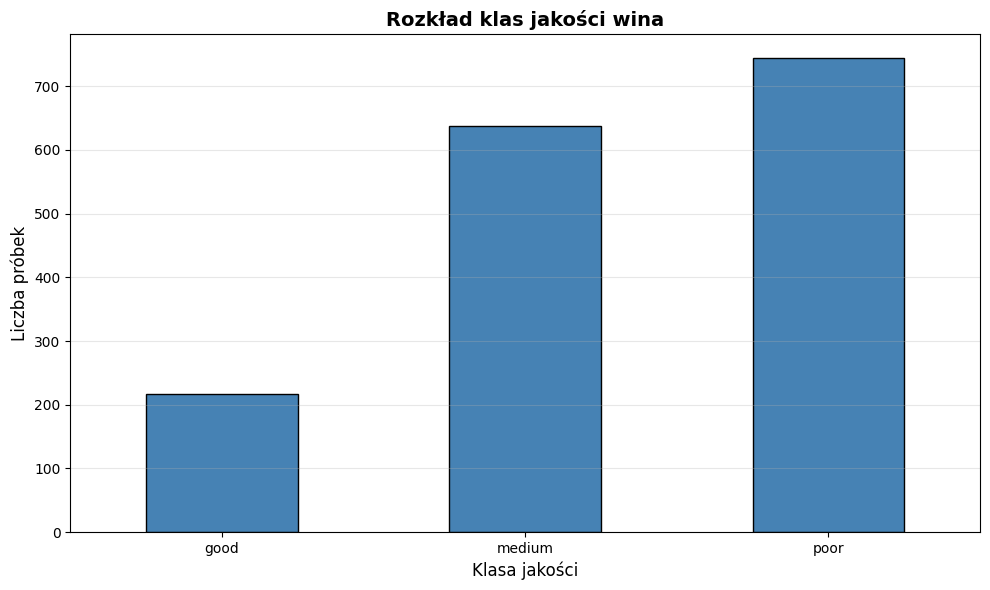

In [ ]:
df = pd.read_csv("winequality-red.csv")
print(df.head())

X = df.drop('quality', axis=1)
y = df['quality']

plt.figure(figsize=(10, 6))
y.value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Rozkład klas jakości wina', fontsize=14, fontweight='bold')
plt.xlabel('Klasa jakości', fontsize=12)
plt.ylabel('Liczba próbek', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"\nRozkład klas w zbiorze treningowym:")
print(y_train.value_counts(normalize=True).sort_index())
print(f"\nRozkład klas w zbiorze testowym:")
print(y_test.value_counts(normalize=True).sort_index())


Rozkład klas w zbiorze treningowym:
quality
good      0.136044
medium    0.398749
poor      0.465207
Name: proportion, dtype: float64

Rozkład klas w zbiorze testowym:
quality
good      0.134375
medium    0.400000
poor      0.465625
Name: proportion, dtype: float64


In [ ]:
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

scaler_results = {}

print("\nTestowanie metod standaryzacji (k=5, 5-fold CV):")

for name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    
    knn = KNeighborsClassifier(n_neighbors=5)
    cv_results = cross_validate(knn, X_train_scaled, y_train, cv=5, 
                                scoring='accuracy', return_train_score=False)
    
    mean_acc = cv_results['test_score'].mean()
    std_acc = cv_results['test_score'].std()
    scaler_results[name] = (mean_acc, std_acc)
    
    print(f"{name:20s}: {mean_acc:.4f}")

best_scaler_name = max(scaler_results, key=lambda k: scaler_results[k][0])
best_scaler = scalers[best_scaler_name]

print(f"\n✓ Wybrana metoda standaryzacji: {best_scaler_name}")
print(f"  Dokładność CV: {scaler_results[best_scaler_name][0]:.4f}")


Testowanie metod standaryzacji (k=5, 5-fold CV):
StandardScaler      : 0.5841
MinMaxScaler        : 0.5848
RobustScaler        : 0.6036

✓ Wybrana metoda standaryzacji: RobustScaler
  Dokładność CV: 0.6036


/tmp/ipykernel_66536/2905134202.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([X_train.iloc[:, i] for i in range(min(5, X_train.shape[1]))],
/tmp/ipykernel_66536/2905134202.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([X_train_scaled[:, i] for i in range(min(5, X_train.shape[1]))],


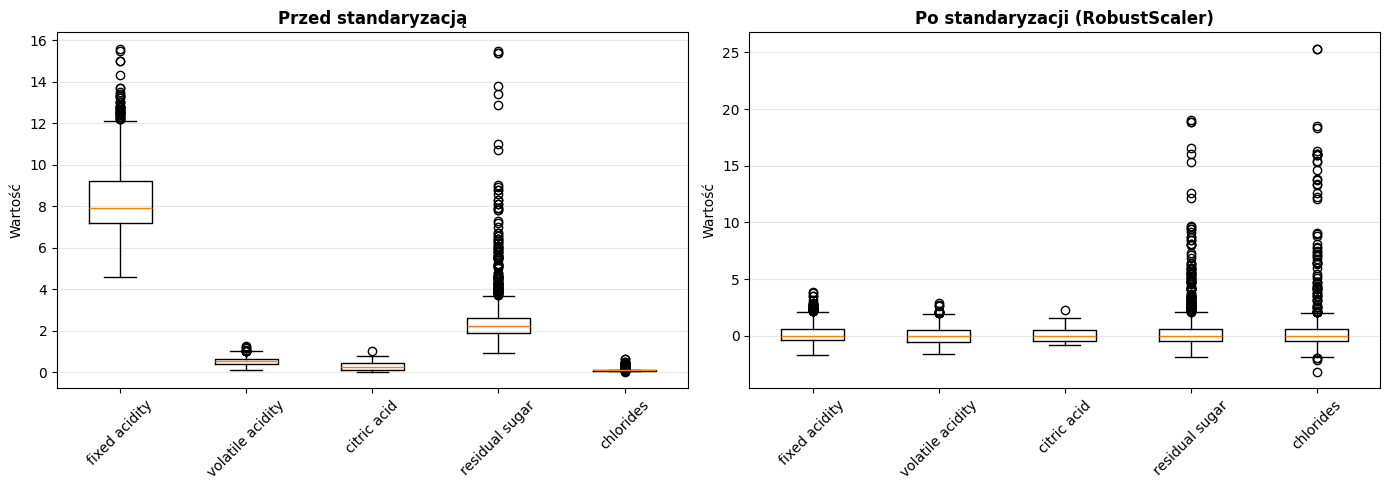

In [18]:
X_train_scaled = best_scaler.fit_transform(X_train)
X_test_scaled = best_scaler.transform(X_test)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot([X_train.iloc[:, i] for i in range(min(5, X_train.shape[1]))], 
                labels=X_train.columns[:5])
axes[0].set_title('Przed standaryzacją', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Wartość', fontsize=10)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

axes[1].boxplot([X_train_scaled[:, i] for i in range(min(5, X_train.shape[1]))], 
                labels=X_train.columns[:5])
axes[1].set_title(f'Po standaryzacji ({best_scaler_name})', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Wartość', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
print("WYBÓR OPTYMALNEJ WARTOŚCI k")

k_range = range(1, 31)
cv_mean_scores = []
cv_std_scores = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(knn, X_train_scaled, y_train, cv=5,
                                scoring='accuracy', return_train_score=False)
    
    mean_score = cv_results['test_score'].mean()
    std_score = cv_results['test_score'].std()
    
    cv_mean_scores.append(mean_score)
    cv_std_scores.append(std_score)
    
    if k % 5 == 0 or k == 1:
        print(f"k={k:2d}: accuracy={mean_score:.4f}")

best_k = k_range[cv_mean_scores.index(max(cv_mean_scores))]
best_cv_score = max(cv_mean_scores)

print(f"\n✓ Optymalna wartość k: {best_k}")
print(f"  Najlepsza dokładność CV: {best_cv_score:.4f}")

WYBÓR OPTYMALNEJ WARTOŚCI k
k= 1: accuracy=0.6309
k= 5: accuracy=0.6036
k=10: accuracy=0.5872
k=15: accuracy=0.5934
k=20: accuracy=0.5692
k=25: accuracy=0.5926
k=30: accuracy=0.5934

✓ Optymalna wartość k: 1
  Najlepsza dokładność CV: 0.6309


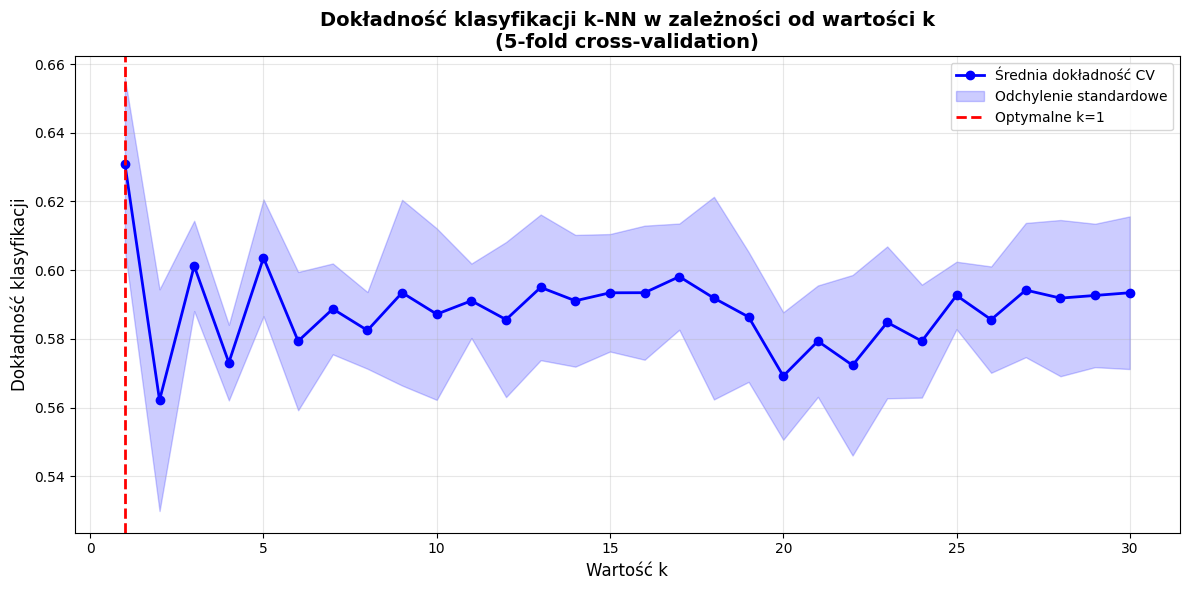

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(k_range, cv_mean_scores, 'b-o', linewidth=2, markersize=6, label='Średnia dokładność CV')
plt.fill_between(k_range, 
                 np.array(cv_mean_scores) - np.array(cv_std_scores),
                 np.array(cv_mean_scores) + np.array(cv_std_scores),
                 alpha=0.2, color='blue', label='Odchylenie standardowe')
plt.axvline(x=best_k, color='red', linestyle='--', linewidth=2, 
            label=f'Optymalne k={best_k}')
plt.xlabel('Wartość k', fontsize=12)
plt.ylabel('Dokładność klasyfikacji', fontsize=12)
plt.title('Dokładność klasyfikacji k-NN w zależności od wartości k\n(5-fold cross-validation)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [25]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

y_pred = final_knn.predict(X_test_scaled)

test_accuracy = metrics.accuracy_score(y_test, y_pred)

print(f"\nDokładność na zbiorze testowym: {test_accuracy:.4f}\n")

print("\nSzczegółowy raport klasyfikacji:")
print(metrics.classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)
print("\nMacierz pomyłek:")
print(cm)


Dokładność na zbiorze testowym: 0.7219


Szczegółowy raport klasyfikacji:
              precision    recall  f1-score   support

        good       0.60      0.67      0.64        43
      medium       0.68      0.66      0.67       128
        poor       0.80      0.79      0.79       149

    accuracy                           0.72       320
   macro avg       0.69      0.71      0.70       320
weighted avg       0.72      0.72      0.72       320


Macierz pomyłek:
[[ 29  11   3]
 [ 17  84  27]
 [  2  29 118]]


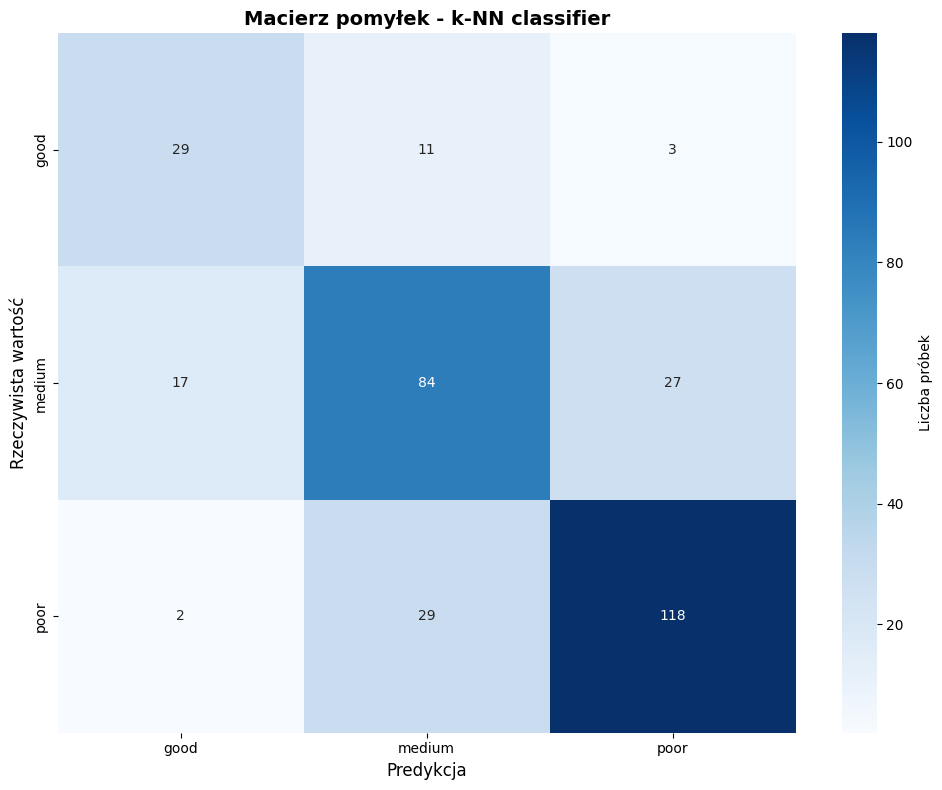

PODSUMOWANIE ANALIZY

Zbiór danych: winequality.csv
├─ Liczba próbek: 1599
├─ Liczba cech: 11
└─ Liczba klas: 3

Preprocessing:
├─ Testowane metody standaryzacji: 3
├─ Wybrana metoda: RobustScaler
├─ Dokładność CV wybranej metody: 0.6036
└─ Podział train/test: 1279/320 (80%/20%)
   └─ Stratyfikacja: TAK

Wybór parametru k:
├─ Zakres testowanych wartości: 1 - 30
├─ Metoda walidacji: 5-fold cross-validation
├─ Optymalna wartość k: 1
└─ Najlepsza dokładność CV: 0.6309

Wyniki finalne:
├─ Dokładność na zbiorze testowym: 0.7219 (72.19%)
└─ Model: k-NN z k=1, standaryzacja: RobustScaler



In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()),
            cbar_kws={'label': 'Liczba próbek'})
plt.title('Macierz pomyłek - k-NN classifier', fontsize=14, fontweight='bold')
plt.xlabel('Predykcja', fontsize=12)
plt.ylabel('Rzeczywista wartość', fontsize=12)
plt.tight_layout()
plt.show()

print("PODSUMOWANIE ANALIZY")

print(f"""
Zbiór danych: winequality.csv
├─ Liczba próbek: {len(X)}
├─ Liczba cech: {X.shape[1]}
└─ Liczba klas: {len(y.unique())}

Preprocessing:
├─ Testowane metody standaryzacji: {len(scalers)}
├─ Wybrana metoda: {best_scaler_name}
├─ Dokładność CV wybranej metody: {scaler_results[best_scaler_name][0]:.4f}
└─ Podział train/test: {X_train.shape[0]}/{X_test.shape[0]} (80%/20%)
   └─ Stratyfikacja: TAK

Wybór parametru k:
├─ Zakres testowanych wartości: {min(k_range)} - {max(k_range)}
├─ Metoda walidacji: 5-fold cross-validation
├─ Optymalna wartość k: {best_k}
└─ Najlepsza dokładność CV: {best_cv_score:.4f}

Wyniki finalne:
├─ Dokładność na zbiorze testowym: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)
└─ Model: k-NN z k={best_k}, standaryzacja: {best_scaler_name}
""")